In [14]:
import scipy.interpolate as itp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob,csv
import scipy.io
import netCDF4 as nc
%matplotlib inline

In [15]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/test/EXP00/1yr/*.nc'))
data=nc.Dataset(nc_filename[1])
dep= data.variables['deptht'];

In [16]:
def writecsv(j):
    for k in range (len(yinterp2)):
    #print k,yinterp2[k],xvals[k]
        for num in range(len(dep)):
            depth_min=dep[num]-1;
            depth_max=dep[num]+1;
            if (xvals[k] >depth_min)&(xvals[k]<depth_max):
                layer[num,j]=num;
                NEMO_dep[num,j]=dep[num];
                Real_dep[num,j]=xvals[k];
                z[num,j]=yinterp2[k];
                lons[num,j]=lon[0]
                lats[num,j]=lat[0]

#Vertical Pa part. Interpolation_spline

In [17]:
nc_filename=sorted(glob.glob('Pa/*.csv'))
print("found *.csv file: \n{}".format(nc_filename))

found *.csv file: 
['Pa/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', 'Pa/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', 'Pa/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', 'Pa/60changed4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', 'Pa/60changed6.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', 'Pa/test.csv']


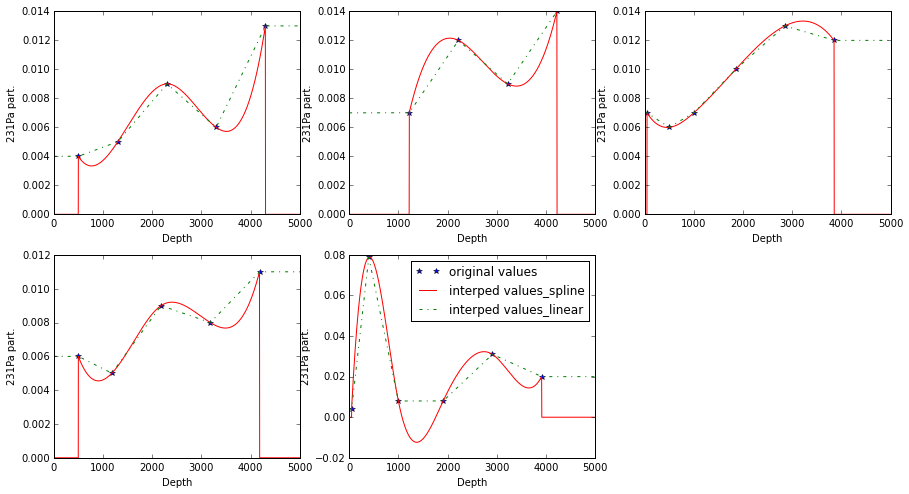

In [18]:
layer=np.empty([31,5])
NEMO_dep=np.empty([31,5])
Real_dep=np.empty([31,5])
lons=np.empty([31,5])
lats=np.empty([31,5])
z=np.empty([31,5])

for j in range(5):
    data=pd.read_csv(nc_filename[j])
    x= data['depth'];
    y=data['231Pa part.'];
    lon = data['long.'];
    lat = data['lat.'];
    #    xvals=np.linspace(min(x),max(x),2500)
    xvals=np.linspace(0,5500,3000)
    yinterp = itp.spline(x,y,xvals)
    yinterp2 = np.interp(xvals, x, y)
    
    ax = plt.figure(1,figsize=(15,8))
    ax = plt.subplot(2,3,j+1)
    plot1=plt.plot(x, y, 'b*',label='original values')
    plot2=plt.plot(xvals, yinterp, 'r-',label='interped values_spline')
    plot3=plt.plot(xvals, yinterp2, 'g-.',label='interped values_linear')
    plt.ylabel('231Pa part.')
    plt.xlabel('Depth')
    plt.xlim([0,5000])
    writecsv(j)
plt.legend(loc=0)
plt.show()
scipy.io.savemat('Pa_part',
                 {'layer':layer,'NEMO_dep':NEMO_dep,'Real_dep':Real_dep,'Pa_part':z,'lons':lons,'lats':lats})

#Vertical Pa diss. Interpolation_spline

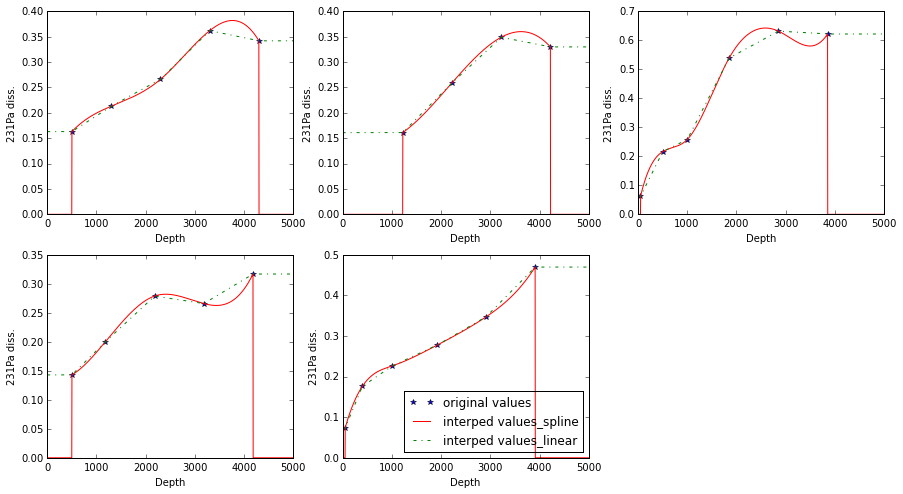

In [19]:
for j in range(5):
    data=pd.read_csv(nc_filename[j])
    x= data['depth'];
    y=data['231Pa diss.'];
    lon = data['long.'];
    lat = data['lat.'];
    xvals=np.linspace(0,5500,3000)
    yinterp = itp.spline(x,y,xvals)
    yinterp2 = np.interp(xvals, x, y)
    
    ax = plt.figure(1,figsize=(15,8))
    ax = plt.subplot(2,3,j+1)
    plot1=plt.plot(x, y, 'b*',label='original values')
    plot2=plt.plot(xvals, yinterp, 'r-',label='interped values_spline')
    plot3=plt.plot(xvals, yinterp2, 'g-.',label='interped values_linear')
    plt.ylabel('231Pa diss.')
    plt.xlabel('Depth')
    plt.xlim([0,5000])
    writecsv(j)
plt.legend(loc=0)
plt.show()
scipy.io.savemat('Pa_diss',
                 {'layer':layer,'NEMO_dep':NEMO_dep,'Real_dep':Real_dep,'Pa_diss':z,'lons':lons,'lats':lats})

#Vertical Th part. Interpolation_spline&linear

In [20]:
filename=sorted(glob.glob('Th/*.csv'))
print("found *.csv file: \n{}".format(filename))

found *.csv file: 
['Th/23_1.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', 'Th/23_2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', 'Th/23_3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', 'Th/23_4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', 'Th/38_2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', 'Th/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', 'Th/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', 'Th/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', 'Th/60changed4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', 'Th/60changed5.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', 'Th/60changed6.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', 'Th/Atlantic_24.Th-Pa_data_July2012.csv', 'Th/Atlantic_25.Th-Pa_data_July2012.csv', 'Th/Atlantic_27.Th-Pa_data_July2012.csv', 'Th/Atlantic_32.Th-Pa_data_July2012.csv', 'Th/test.csv']


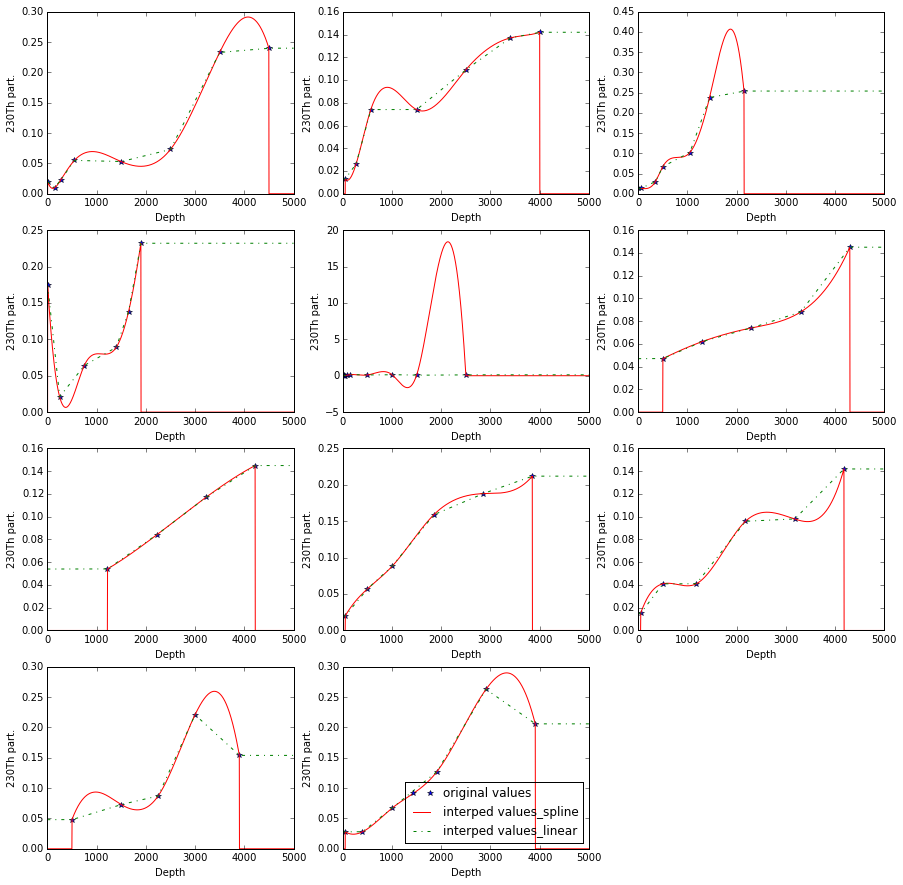

In [21]:
layer=np.empty([31,11])
NEMO_dep=np.empty([31,11])
Real_dep=np.empty([31,11])
lons=np.empty([31,11])
lats=np.empty([31,11])
z=np.empty([31,11])


for i in range(11):
    data=pd.read_csv(filename[i])
    x= data['depth'];
    y=data['230Th part.'];
    lon = data['long.'];
    lat = data['lat.'];
    xvals=np.linspace(0,5500,3000)
    yinterp = itp.spline(x,y,xvals)
    yinterp2 = np.interp(xvals, x, y)
    
    ax = plt.figure(1,figsize=(15,15))
    ax = plt.subplot(4,3,i+1)
    plot1=plt.plot(x, y, 'b*',label='original values')
    plot2=plt.plot(xvals, yinterp, 'r-',label='interped values_spline')
    plot3=plt.plot(xvals, yinterp2, 'g-.',label='interped values_linear')
    plt.ylabel('230Th part.')
    plt.xlabel('Depth')
    plt.xlim([0,5000])
    writecsv(i)
plt.legend(loc=0)
plt.show()
scipy.io.savemat('Th_part',
                 {'layer':layer,'NEMO_dep':NEMO_dep,'Real_dep':Real_dep,'Th_part':z,'lons':lons,'lats':lats})

#Vertical Th diss. Interpolation_spline&linear

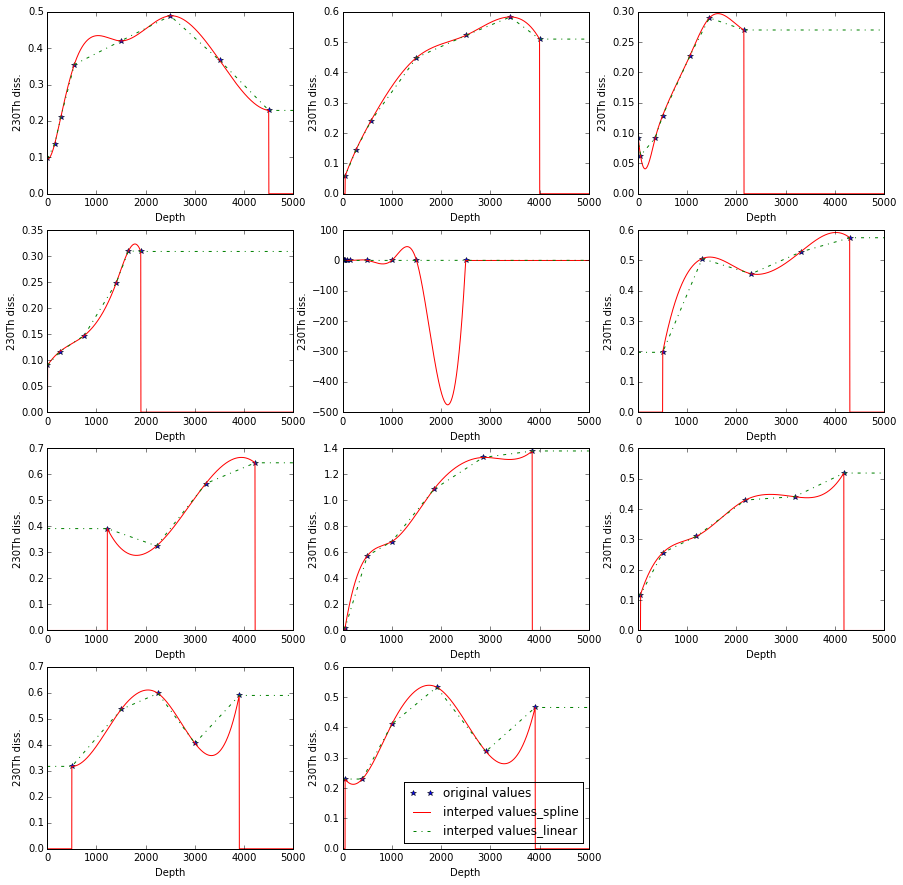

In [22]:
for i in range(11):
    data=pd.read_csv(filename[i])
    x= data['depth'];
    y=data['230Th diss.'];
    lon = data['long.'];
    lat = data['lat.'];
    xvals=np.linspace(0,5500,3000)
    yinterp = itp.spline(x,y,xvals)
    yinterp2 = np.interp(xvals, x, y)
    
    ax = plt.figure(1,figsize=(15,15))
    ax = plt.subplot(4,3,i+1)
    plot1=plt.plot(x, y, 'b*',label='original values')
    plot2=plt.plot(xvals, yinterp, 'r-',label='interped values_spline')
    plot3=plt.plot(xvals, yinterp2, 'g-.',label='interped values_linear')
    plt.ylabel('230Th diss.')
    plt.xlabel('Depth')
    plt.xlim([0,5000])
    writecsv(i)
plt.legend(loc=0)
plt.show()
scipy.io.savemat('Th_diss',
                 {'layer':layer,'NEMO_dep':NEMO_dep,'Real_dep':Real_dep,'Th_diss':z,'lons':lons,'lats':lats})

#load data

In [26]:
Th_diss_data=scipy.io.loadmat('Pa_part.mat')
layer=Th_diss_data['Pa_part']
print layer

[[ 0.004       0.007       0.007       0.006       0.004     ]
 [ 0.004       0.007       0.007       0.006       0.004     ]
 [ 0.004       0.007       0.007       0.006       0.004     ]
 [ 0.004       0.007       0.007       0.006       0.004     ]
 [ 0.004       0.007       0.007       0.006       0.004     ]
 [ 0.004       0.007       0.00698885  0.006       0.00507249]
 [ 0.004       0.007       0.0069644   0.006       0.00742413]
 [ 0.004       0.007       0.00694402  0.006       0.00938383]
 [ 0.004       0.007       0.00691957  0.006       0.01173547]
 [ 0.004       0.007       0.00689919  0.006       0.01369517]
 [ 0.004       0.007       0.00687474  0.006       0.01604682]
 [ 0.004       0.007       0.00685028  0.006       0.01839846]
 [ 0.004       0.007       0.00682583  0.006       0.0207501 ]
 [ 0.004       0.007       0.00679323  0.006       0.02388562]
 [ 0.004       0.007       0.00675655  0.006       0.02741308]
 [ 0.004       0.007       0.00670764  0.006       0.03